In [1]:
# Python
import pandas as pd
from prophet import Prophet

d:\claseMreporeto\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [10]:
reservaciones = pd.read_excel("../data/reservaciones_time_series.xlsx").sort_values(
    "fecha_ocupacion",
    ascending=True,
)
reservaciones.head()

,fecha_ocupacion,h_num_per,h_num_noc,h_tot_hab,tasa_ocupacion
0,2019-02-13,1231,1498.0,604.0,0.437364
1,2019-02-14,1559,2969.5,730.0,0.528602
2,2019-02-15,1786,3245.0,798.0,0.577842
3,2019-02-16,1905,3706.5,855.0,0.619117
4,2019-02-17,1564,3651.0,692.0,0.501086


# Transform into ds and y

In [38]:
# Example: Load data

df = reservaciones[['fecha_ocupacion','tasa_ocupacion']]
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df['cap'] = 1.0  # upper bound
df['floor'] = 0.0  # optional lower bound (default is 0)
df.head()

C:\Users\angel\AppData\Local\Temp\ipykernel_15744\3054352263.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['ds'])
C:\Users\angel\AppData\Local\Temp\ipykernel_15744\3054352263.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cap'] = 1.0  # upper bound
C:\Users\angel\AppData\Local\Temp\ipykernel_15744\3054352263.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,ds,y,cap,floor
0,2019-02-13,0.437364,1.0,0.0
1,2019-02-14,0.528602,1.0,0.0
2,2019-02-15,0.577842,1.0,0.0
3,2019-02-16,0.619117,1.0,0.0
4,2019-02-17,0.501086,1.0,0.0


# 2. Split into train/test sets

In [57]:
# For example, use 80% for training, 20% for testing
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

In [58]:
len(train), len(test)

(558, 140)

In [70]:
mexican_holidays = pd.DataFrame({
    'holiday': [
        'New Year\'s Day', 'Constitution Day', 'Benito Juárez Day',
        'Labor Day', 'Independence Day', 'Revolution Day',
        'Christmas Day1', 'ChristmasDay2', 'ChristmasDay3', 'Christmas Day4', 'ChristmasDay5', 'ChristmasDay6',
        'Christmas Day7', 'ChristmasDay8', 'ChristmasDay9', 'Christmas Day10', 'ChristmasDay11',
          'Day of the Dead', 'Holy Thursday', 'Good Friday'
    ],
    'ds': pd.to_datetime([
        '2024-01-01',  # Año Nuevo
        '2024-02-05',  # Día de la Constitución (first Monday of Feb)
        '2024-03-18',  # Natalicio de Benito Juárez (observed)
        '2024-05-01',  # Día del Trabajo
        '2024-09-16',  # Día de la Independencia
        '2024-11-18',  # Día de la Revolución (observed)
        '2024-12-21',  # Navidad
        '2024-12-22',  # Navidad
        '2024-12-23',  # Navidad
        '2024-12-24',  # Navidad
        '2024-12-25',  # Navidad
        '2024-12-26',  # Navidad
        '2024-12-27',  # Navidad
        '2024-12-28',  # Navidad
        '2024-12-29',  # Navidad
        '2024-12-30',  # Navidad
        '2024-12-31',  # Navidad
        '2024-11-02',  # Día de Muertos
        '2024-03-28',  # Jueves Santo
        '2024-03-29',  # Viernes Santo
    ]),
    'lower_window': -2,
    'upper_window': 2
})

In [71]:
model = Prophet(growth='logistic',holidays=mexican_holidays)
model.fit(train)

17:27:00 - cmdstanpy - INFO - Chain [1] start processing
17:27:00 - cmdstanpy - INFO - Chain [1] done processing


In [72]:
future = test[['ds']]  # Use the actual dates from your test set
future['cap'] = 1.0
future['floor'] = 0.0
forecast = model.predict(future)

C:\Users\angel\AppData\Local\Temp\ipykernel_15744\536825304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future['cap'] = 1.0
C:\Users\angel\AppData\Local\Temp\ipykernel_15744\536825304.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future['floor'] = 0.0


In [73]:
from sklearn.metrics import mean_squared_error

# Compare predicted 'yhat' to actual 'y'
y_true = test['y'].values
y_pred = forecast['yhat'].values

mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.008773286082187411


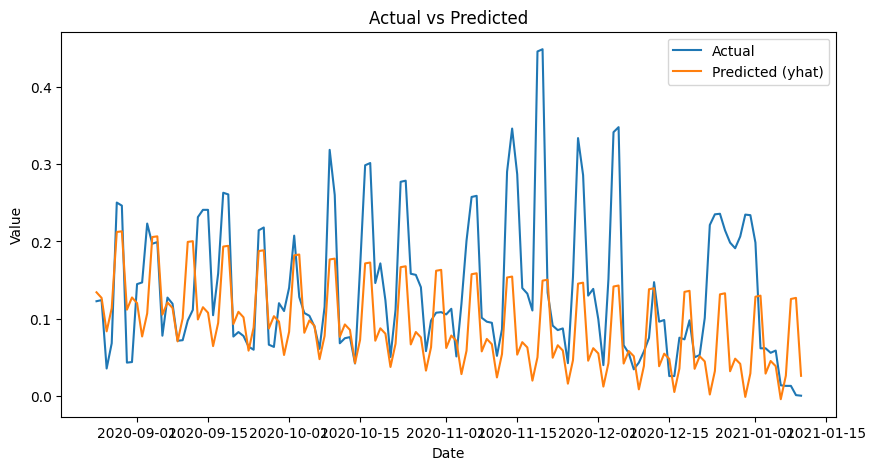

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(test['ds'], y_true, label='Actual')
plt.plot(test['ds'], y_pred, label='Predicted (yhat)')
plt.legend()
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

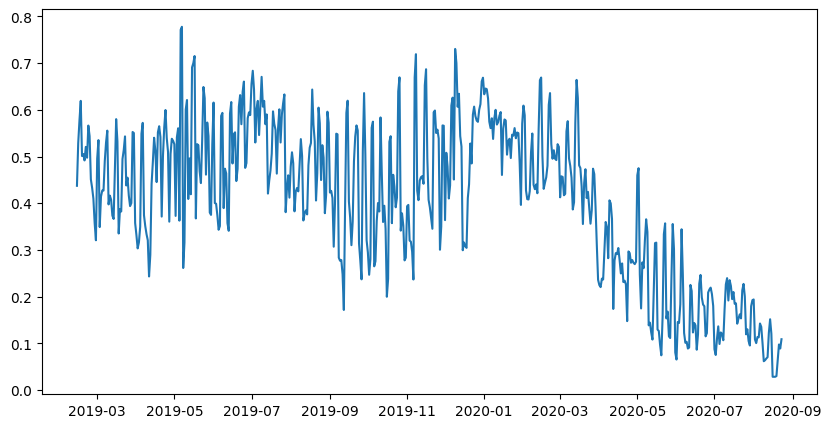

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train['ds'], train['y'], label='Actual')


In [48]:
# Show the top 10 maximum ['ds'] dates
test.sort_values(by='y', ascending=False).head(10)

,ds,y,cap,floor
646,2020-11-20,0.448226,1.0,0.0
645,2020-11-19,0.445329,1.0,0.0
661,2020-12-05,0.347574,1.0,0.0
640,2020-11-14,0.345764,1.0,0.0
660,2020-12-04,0.341057,1.0,0.0
653,2020-11-27,0.333454,1.0,0.0
604,2020-10-09,0.318248,1.0,0.0
612,2020-10-17,0.301231,1.0,0.0
611,2020-10-16,0.298335,1.0,0.0
639,2020-11-13,0.290007,1.0,0.0


In [32]:
future = df[['ds']]  # Use the actual dates from your test set
future['cap'] = 1.0
future['floor'] = 0.0
forecast = model.predict(future)

C:\Users\angel\AppData\Local\Temp\ipykernel_15744\1891271232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future['cap'] = 1.0
C:\Users\angel\AppData\Local\Temp\ipykernel_15744\1891271232.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future['floor'] = 0.0


In [33]:
from sklearn.metrics import mean_squared_error

# Compare predicted 'yhat' to actual 'y'
y_true = df['y'].values
y_pred = forecast['yhat'].values

mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.009416238660561387


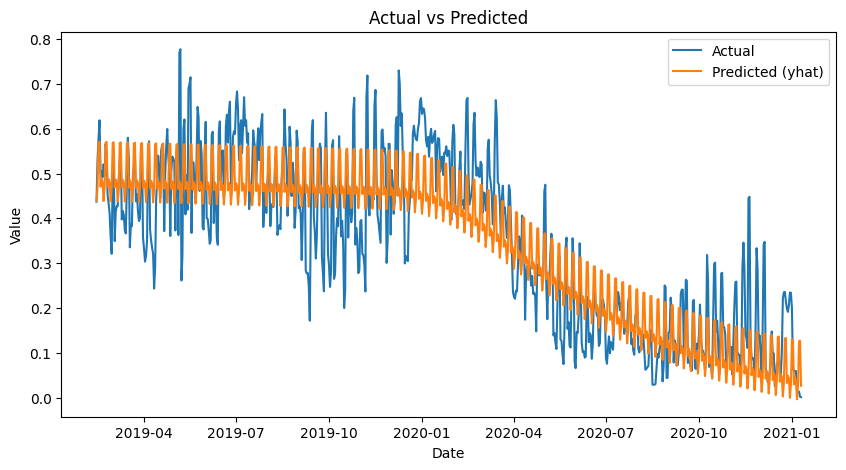

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df['ds'], y_true, label='Actual')
plt.plot(df['ds'], y_pred, label='Predicted (yhat)')
plt.legend()
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

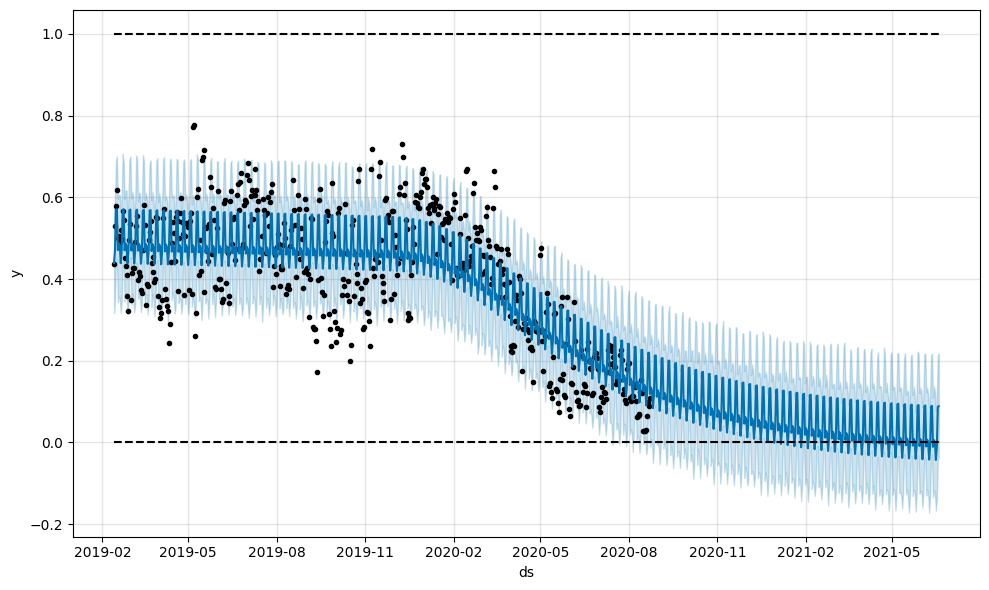

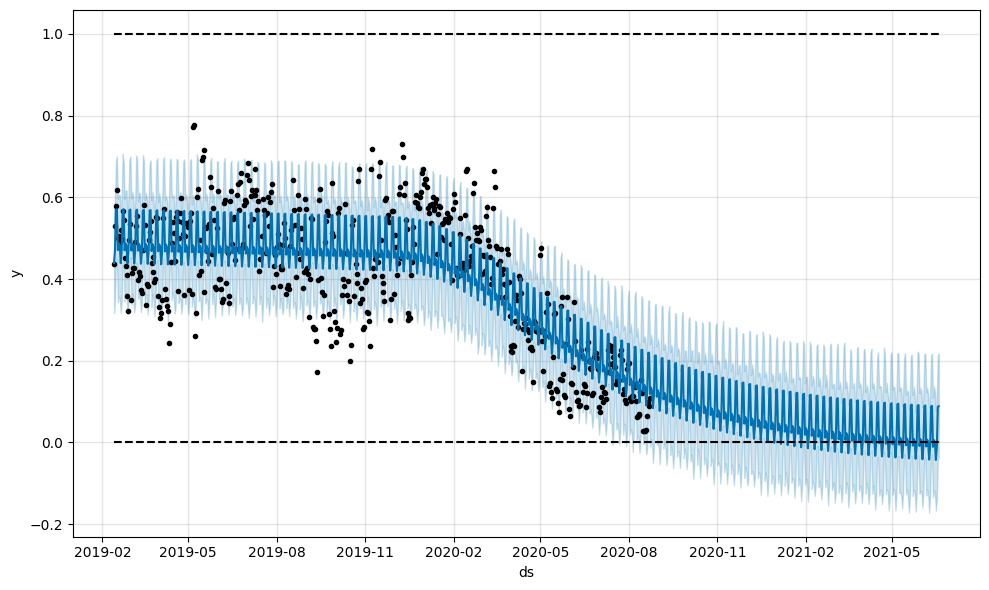

In [37]:
future = model.make_future_dataframe(periods=300)  # e.g., forecast 30 future time steps
future['cap'] = 1.0
future['floor'] = 0.0
forecast = model.predict(future)
model.plot(forecast)

In [76]:
ocupaciones = pd.read_excel("../data/ocupaciones_time_series.xlsx").sort_values(
    "Fecha_hoy",
    ascending=True,
)
ocupaciones.head()

,Fecha_hoy,ing_hab,cto_noc,ADR,num_men,num_adu,TREVPEC
0,2020-11-01,927648.034522,868,477394.231715,396,1734,471826.448439
1,2020-11-02,868258.479988,802,425539.047647,460,1616,425609.064185
2,2020-11-03,820402.234539,760,385132.296256,400,1536,376829.251489
3,2020-11-04,635985.269950,574,357115.104148,200,1114,352913.936147
4,2020-11-05,918465.560104,816,477790.026518,256,1646,453186.729292


In [77]:
# Example: Load data

df = ocupaciones[['Fecha_hoy','cto_noc']]
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df.head()

C:\Users\angel\AppData\Local\Temp\ipykernel_15744\1272545242.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['ds'])


,ds,y
0,2020-11-01,868
1,2020-11-02,802
2,2020-11-03,760
3,2020-11-04,574
4,2020-11-05,816


In [79]:
# For example, use 80% for training, 20% for testing
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]
len(train), len(test)

(756, 190)

In [80]:
model = Prophet()
model.fit(train)

17:40:03 - cmdstanpy - INFO - Chain [1] start processing
17:40:03 - cmdstanpy - INFO - Chain [1] done processing


In [81]:
future = test[['ds']]  # Use the actual dates from your test set
forecast = model.predict(future)

In [82]:
from sklearn.metrics import mean_squared_error

# Compare predicted 'yhat' to actual 'y'
y_true = test['y'].values
y_pred = forecast['yhat'].values

mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 4183994.0091112438


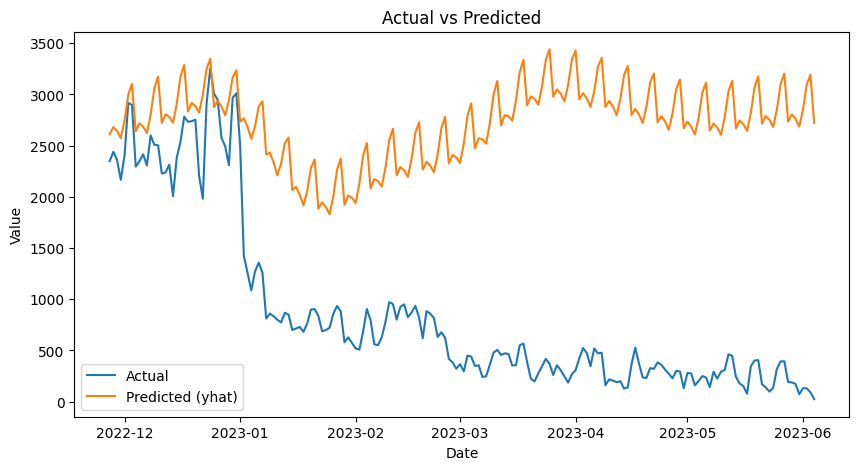

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(test['ds'], y_true, label='Actual')
plt.plot(test['ds'], y_pred, label='Predicted (yhat)')
plt.legend()
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()